https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

# Practice data set - Loan Prediction Problem

# Importing libraries and the data set

In [44]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [45]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# Quick Data Exploration

In [46]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

LoanAmount has (614 – 592) 22 missing values.

Loan_Amount_Term has (614 – 600) 14 missing values.

Credit_History has (614 – 564) 50 missing values.

We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)

The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome


In [47]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [48]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Distribution analysis

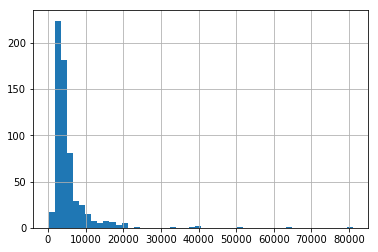

In [49]:
df['ApplicantIncome'].hist(bins=50)

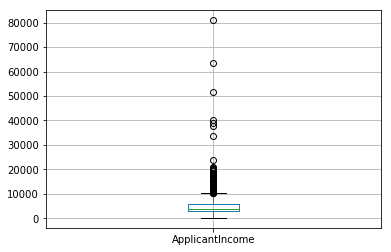

In [50]:
df.boxplot(column='ApplicantIncome')

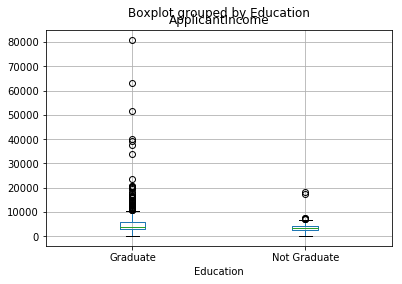

In [51]:
df.boxplot(column='ApplicantIncome',by='Education')

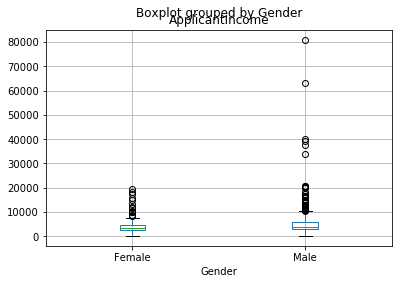

In [52]:
df.boxplot(column='ApplicantIncome',by='Gender')

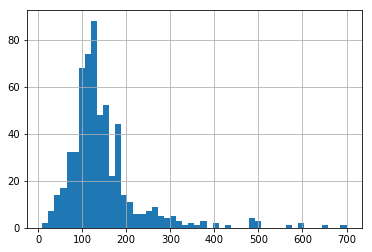

In [53]:
df['LoanAmount'].hist(bins=50)

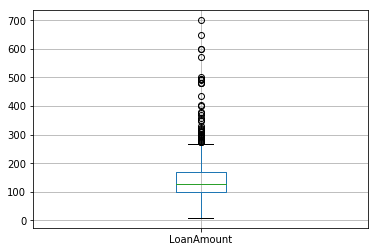

In [54]:
df.boxplot(column='LoanAmount')

# Categorical variable analysis

In [55]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('\n Probability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


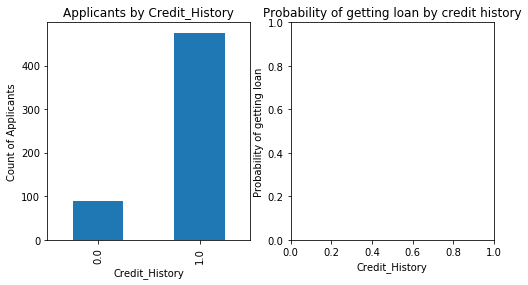

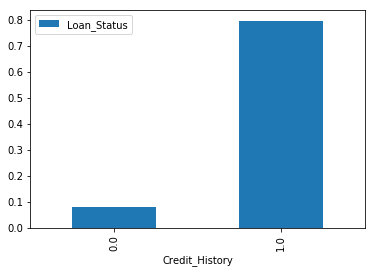

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

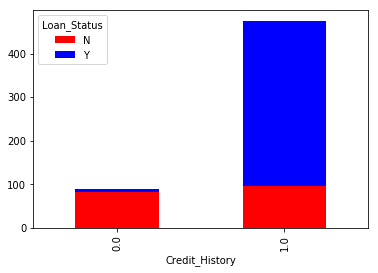

In [57]:
temp3 = pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

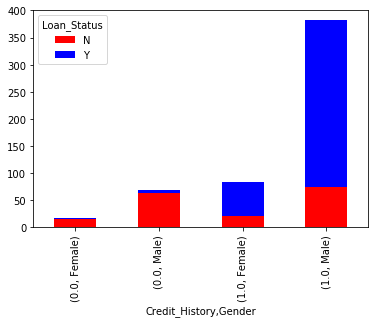

In [58]:
temp3 = pd.crosstab([df['Credit_History'],df['Gender']],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

# Check missing values in the dataset

In [59]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# How to fill missing values in LoanAmount?

In [42]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

The other extreme could be to build a supervised learning model to predict loan amount on the basis of other variables and then use age along with other variables to predict survival.

Since, the purpose now is to bring out the steps in data munging, I’ll rather take an approach, which lies some where in between these 2 extremes. A key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount.

First, let’s look at the boxplot to see if a trend exists:

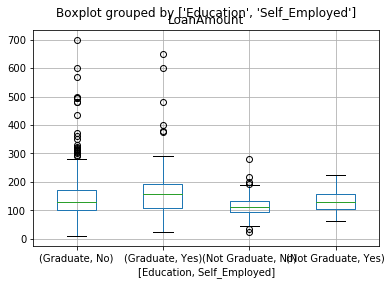

In [60]:
df.boxplot(column='LoanAmount',by=['Education','Self_Employed'])

Thus we see some variations in the median of loan amount for each group and this can be used to impute the values. But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:

In [61]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [62]:
df['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [63]:
table = df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
#Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
#Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)

In [64]:
table

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0

# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

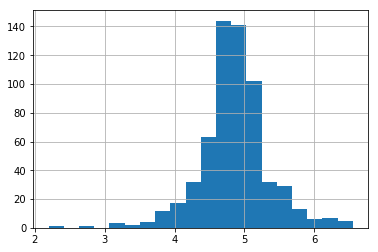

In [65]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

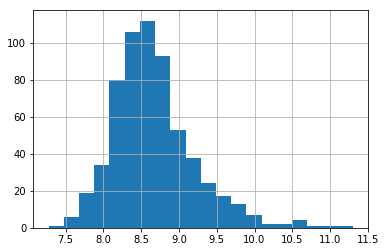

In [66]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

Now we see that the distribution is much better than before. I will leave it upto you to impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History. Also, I encourage you to think about possible additional information which can be derived from the data. For example, creating a column for LoanAmount/TotalIncome might make sense as it gives an idea of how well the applicant is suited to pay back his loan.

# Building a Predictive Model in Python

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [67]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       130.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  LoanAmount_log  TotalIncome  \
0             1.0         Urban           Y        4.867534       5849.0   
1             1.0         Rural           N        4.852030       6091.0   
2             1.0         Urban           Y        4.189655       3000.0   
3             1.0         Urban           Y        4.787492       4941.0   
4             1.0         Urban           Y        4.948760       6000.0   

   TotalIncome_log  
0         8.674026  
1         8.714568  
2         8.006368  
3         8.505323  
4         8.699515

# 必须处理好全部的missing_value

In [68]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [75]:
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)

In [76]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [77]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold                #For k-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

In [78]:
#Generic function for making a classification model and accessing performance
def classification_model(model,data,predictors,outcome):
    #Fit the model
    model.fit(data[predictors],data[outcome])
    
    #Make predictions on training set
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    
    #perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0],n_folds=5)
    error = []
    for train ,test in kf:
        #Filter training data
        train_predictors = data[predictors].iloc[train,:]
        
        #The target we're using to train the algorithm
        train_target = data[outcome].iloc[train]
        
        #Training the algorithm using the predictors and target
        model.fit(train_predictors,train_target)
        
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    
    print("Cross-Validation Score: %s" % "{0:.3%}".format(np.mean(error)))
    
    #Fit the model again so that it can be refered outside the function
    model.fit(data[predictors],data[outcome])
        

# Logistic Regression

https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

Applicants having a credit history (remember we observed this in exploration?)
Applicants with higher applicant and co-applicant incomes
Applicants with higher education level
Properties in urban areas with high growth perspectives
So let’s make our first model with ‘Credit_History’.

In [79]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


In [80]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:

Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
Better modeling techniques. Let’s explore this next.

# Decision Tree

https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

In [81]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


Here the model based on categorical variables is unable to have an impact because Credit History is dominating over them. Let’s try a few numerical variables:

In [83]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 88.925%
Cross-Validation Score: 69.374%


Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:

# Random Forest

https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [84]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender','Married','Dependents','Education',
                'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
                'LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 100.000%
Cross-Validation Score: 77.853%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

Reducing the number of predictors
Tuning the model parameters
Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [85]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.273665
TotalIncome_log     0.265835
LoanAmount_log      0.228143
Dependents          0.048511
Property_Area       0.047156
Loan_Amount_Term    0.044406
Married             0.026368
Gender              0.023182
Education           0.023171
Self_Employed       0.019563
dtype: float64


Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

In [86]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 82.573%
Cross-Validation Score: 80.785%


Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in slight variations because of randomization. But the output should stay in the ballpark.

You would have noticed that even after some basic parameter tuning on random forest, we have reached a cross-validation accuracy only slightly better than the original logistic regression model. This exercise gives us some very interesting and unique learning:

Using a more sophisticated model does not guarantee better results.
Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art and creativity lies in enhancing your features to better suit the model.